In [8]:
from casadi import *
import numpy as np
from PyCon.dynamics import *
from PyCon.ocp import *

import matplotlib
import matplotlib.pyplot as plt

In [9]:
# Declare model variables
x = MX.sym('x',2,1)
u = MX.sym('u',1,1)
t = MX.sym('t',1,1)

# Model equations
xdot = vcat([           -x[1]*sin(t)               , 
                  -0.25*x[1]**3-x[0] + u[0]        ])

## Build dynamics obj
idyn = dynamics(t,x,u,xdot)
# If you want you can set a time span, if not the default time spam is np.linspace(0,1,100)
idyn.set_tspan(np.linspace(0,5,100))

idyn.SetIntegrator()

When you set time span of dynamics, then you must use SetIntegrator() method.


In [10]:
## Build OCP obj
PathCost   = 1e-3*dot(u,u)
FinalCost   = dot(x,x)
##
iocp = ocp(idyn,PathCost,FinalCost)
# Choose integrator 
iocp.functional.SetIntegrator()
# Set initial Condition
x0_num = [1,0]
# Compile the NLP, where you fix the initial condition of your problem
iocp.BuildNLP(x0_num)

In [11]:
# Take a initial guess of control for optimisation
ut_guess = iocp.dynamics.ZerosControl()
# Solve NLP via IPOPT Optimizer
[u_opt,xt_opt] = iocp.SolveNLP(ut_guess)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     4950

Total number of variables............................:       99
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

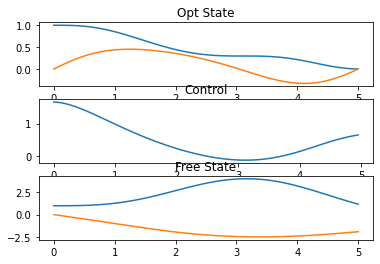

In [12]:
fig, ax = plt.subplots(3,1)

Nt    = idyn.get_Nt()
tspan = idyn.tspan

xt_opt = iocp.dynamics.Ftraj(x0_num,u_opt)

ax[0].plot(tspan,xt_opt.T)
ax[0].set_title('Opt State')

xt_free = iocp.dynamics.Ftraj(x0_num,u_opt*0 )

ax[2].plot(tspan,xt_free.T)
ax[2].set_title('Free State')

ax[1].plot(tspan[0:-1], u_opt.T)
ax[1].set_title('Control')
plt.show()